# 1. 패키지 임포트

In [7]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats
import scipy.stats as stats
from scipy.stats import ttest_ind
import pandas as pd
from scipy import stats

# 2. 데이터 불러오기 및 확인

In [8]:
df = pd.read_csv('/content/Golf_test.csv')

df.head()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


# 3. stats패키지로 ANOVA 검정

In [9]:
F_statistic,pVal = stats.f_oneway(df['TypeA_before'],
                                  df['TypeB_before'],
                                  df['TypeC_before'])

print('일원분산분석결과 : F ={0: .1f}, p={1:.5f}'.format(F_statistic, pVal))

일원분산분석결과 : F = 4.2, p=0.01652


P value가 0.016이므로 3개 변수 중 최소한 하나의 변수 조합 간에는
차이가 있음

# 4. ols 패키지 ANOVA 검정을 위한 데이터 재구조화

In [10]:
df2 = pd.melt(df)
df2 = df2[df2['variable'].isin(['TypeA_before', 'TypeB_before', 'TypeC-before'])]

df2.head()

,variable,value
0,TypeA_before,277
1,TypeA_before,269
2,TypeA_before,263
3,TypeA_before,266
4,TypeA_before,262


melt() 함수를 사용하여 구분자인 variable 칼럼과 실젯값이
담긴 value 칼럼으로 재구조화해주었다

# 5. ols 패키지 ANOVA 검정

In [11]:
model = ols('value~C(variable)', df2).fit()
print(anova_lm(model))

               df   sum_sq     mean_sq         F    PR(>F)
C(variable)   1.0   660.49  660.490000  7.781288  0.006344
Residual     98.0  8318.42   84.881837       NaN       NaN


# 6. 사후검정 수행

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj  lower  upper  reject
--------------------------------------------------------------
TypeA_before TypeB_before     5.14 0.0063 1.4834 8.7966   True
--------------------------------------------------------------


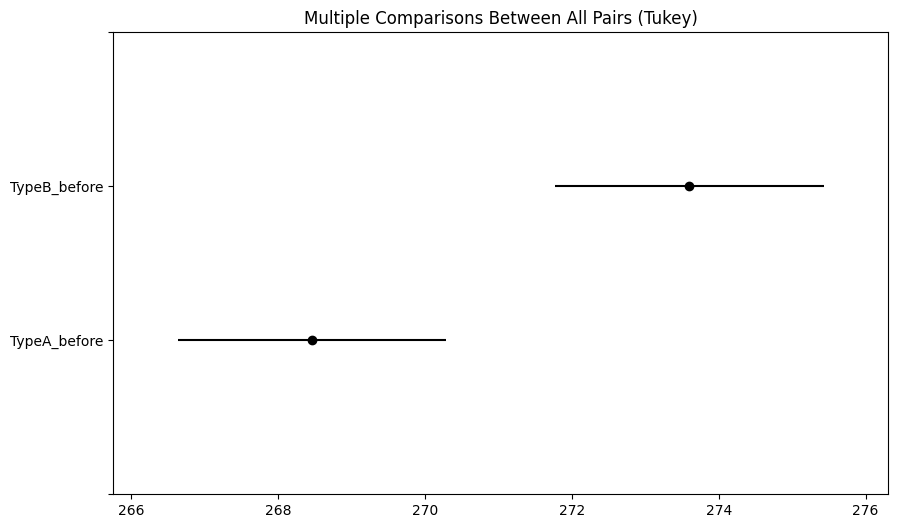

In [12]:
posthoc = pairwise_tukeyhsd(df2['value'],
                            df2['variable'],
                            alpha = 0.05)

print(posthoc)
fig = posthoc.plot_simultaneous()

TypeA_before와 TypeB_before 간에만 유의미한 차이가 있다